In [2]:
import pandas as pd
url = 'pima-indian-diabetes.data.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
fc=['pregnant','insulin','bmi','age']
X=pima[fc]
y=pima.label

In [5]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

/opt/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
k_range=range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [8]:
import matplotlib.pyplot as plt

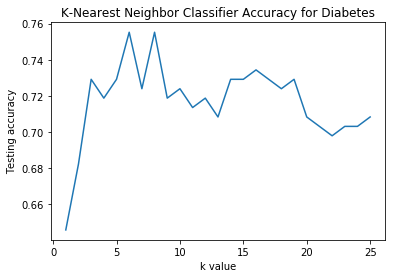

In [9]:
%matplotlib inline

plt.plot(k_range,scores)
plt.xlabel('k value')
plt.ylabel('Testing accuracy')
plt.title('K-Nearest Neighbor Classifier Accuracy for Diabetes')

In [10]:
print scores

[0.64583333333333337, 0.68229166666666663, 0.72916666666666663, 0.71875, 0.72916666666666663, 0.75520833333333337, 0.72395833333333337, 0.75520833333333337, 0.71875, 0.72395833333333337, 0.71354166666666663, 0.71875, 0.70833333333333337, 0.72916666666666663, 0.72916666666666663, 0.734375, 0.72916666666666663, 0.72395833333333337, 0.72916666666666663, 0.70833333333333337, 0.703125, 0.69791666666666663, 0.703125, 0.703125, 0.70833333333333337]


In [11]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=knn.score(X_train, y_train)
print accuracy #for Diabetes

0.772569444444


In [12]:
from sklearn import metrics

In [13]:
print (metrics.confusion_matrix(y_test,y_pred))

[[121   9]
 [ 38  24]]


In [14]:
knn.predict_proba(X_test)[0:10,:]

array([[ 0.66666667,  0.33333333],
       [ 1.        ,  0.        ],
       [ 0.66666667,  0.33333333],
       [ 0.33333333,  0.66666667],
       [ 0.83333333,  0.16666667],
       [ 1.        ,  0.        ],
       [ 0.33333333,  0.66666667],
       [ 0.16666667,  0.83333333],
       [ 0.66666667,  0.33333333],
       [ 0.66666667,  0.33333333]])

In [15]:
from sklearn.preprocessing import binarize

In [16]:
y_pred=binarize([y_pred],0.3)[0]

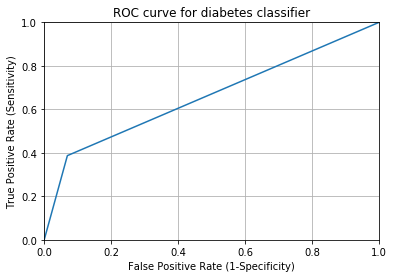

In [17]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [18]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=svm.score(X_train, y_train)
accuracy

0.98263888888888884

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
accuracy=gnb.score(X_train, y_train)
accuracy

0.67534722222222221

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy=dt.score(X_train, y_train)
accuracy

0.99826388888888884

In [21]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accuracy=rfc.score(X_train, y_train)
accuracy

0.96701388888888884

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
accuracy=abc.score(X_train, y_train)
accuracy

0.77083333333333337